In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import plotly.express as px
%matplotlib inline 

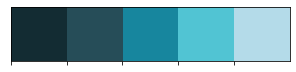

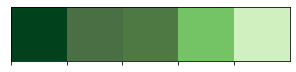

In [87]:
colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']
sns.palplot(colors_blue)
sns.palplot(colors_green)

In [88]:
data=pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [89]:
data.shape

(10000, 14)

In [90]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [92]:
data['RowNumber'].nunique()

10000

In [93]:
data.drop(columns={'RowNumber'},inplace=True)

In [94]:
data.shape

(10000, 13)

In [95]:
data=pd.get_dummies(data,columns=['Gender','Geography'],drop_first=True)
data.head()

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerId         10000 non-null  int64  
 1   Surname            10000 non-null  object 
 2   CreditScore        10000 non-null  int64  
 3   Age                10000 non-null  int64  
 4   Tenure             10000 non-null  int64  
 5   Balance            10000 non-null  float64
 6   NumOfProducts      10000 non-null  int64  
 7   HasCrCard          10000 non-null  int64  
 8   IsActiveMember     10000 non-null  int64  
 9   EstimatedSalary    10000 non-null  float64
 10  Exited             10000 non-null  int64  
 11  Gender_Male        10000 non-null  uint8  
 12  Geography_Germany  10000 non-null  uint8  
 13  Geography_Spain    10000 non-null  uint8  
dtypes: float64(2), int64(8), object(1), uint8(3)
memory usage: 888.8+ KB


In [97]:
data['Gender_Male']=data['Gender_Male'].astype(int)

In [98]:
data['Geography_Germany']=data['Geography_Germany'].astype(int)
data['Geography_Spain']=data['Geography_Spain'].astype(int)

In [99]:
numeric_cols=data.select_dtypes(include='number').columns
numeric_cols

Index(['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Gender_Male', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

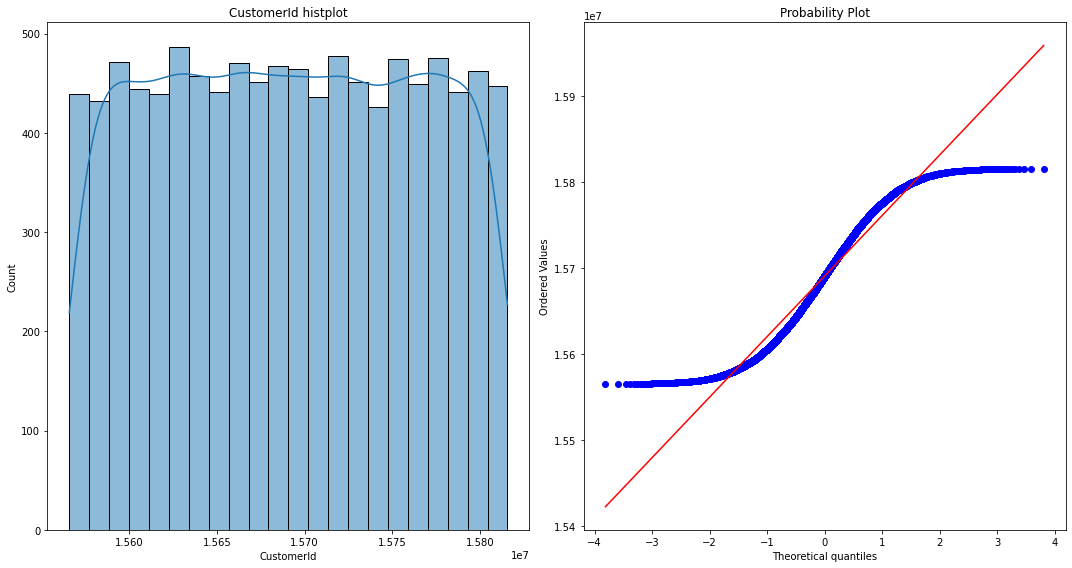

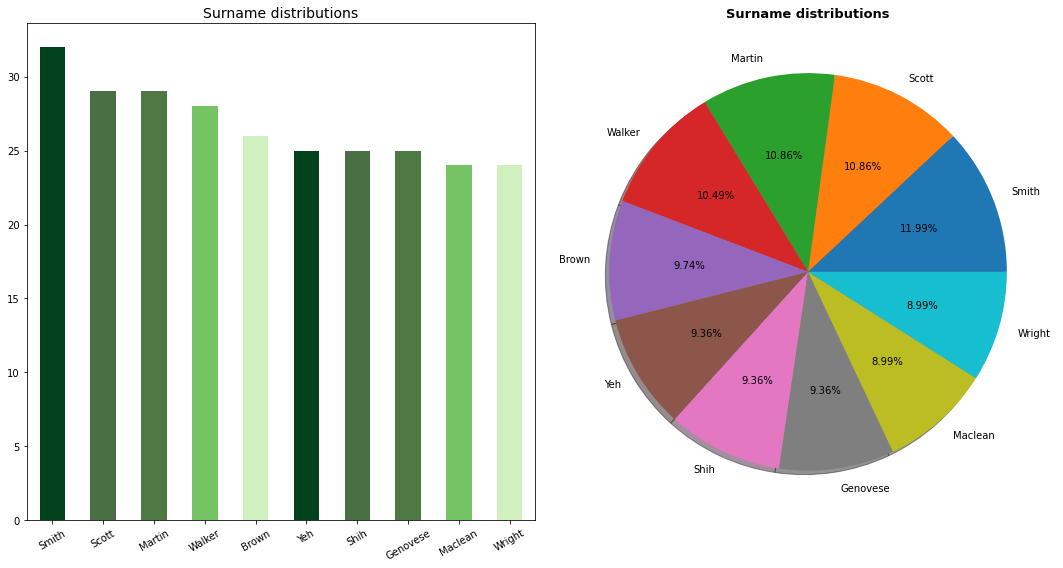

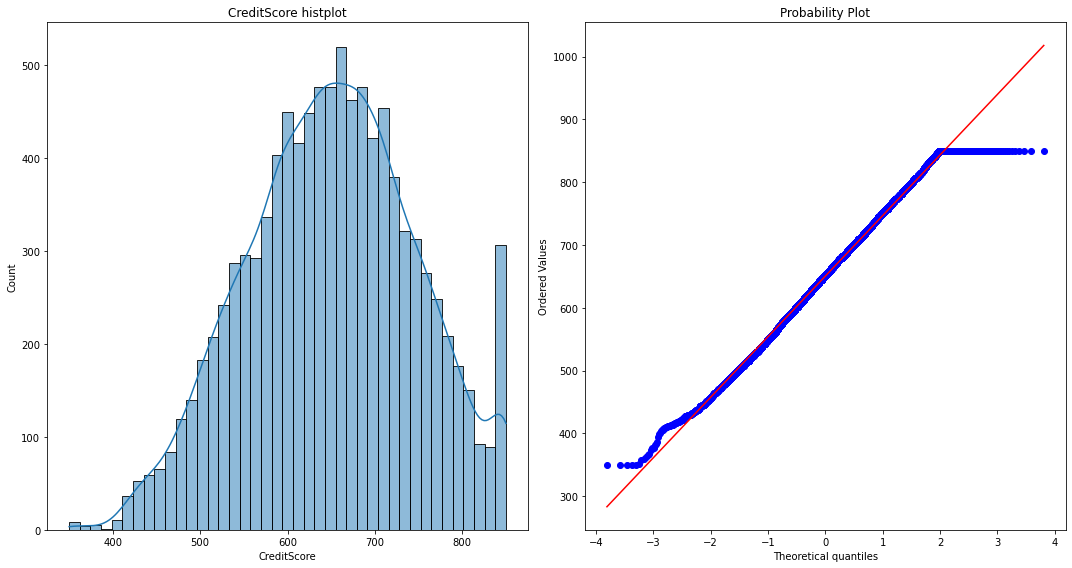

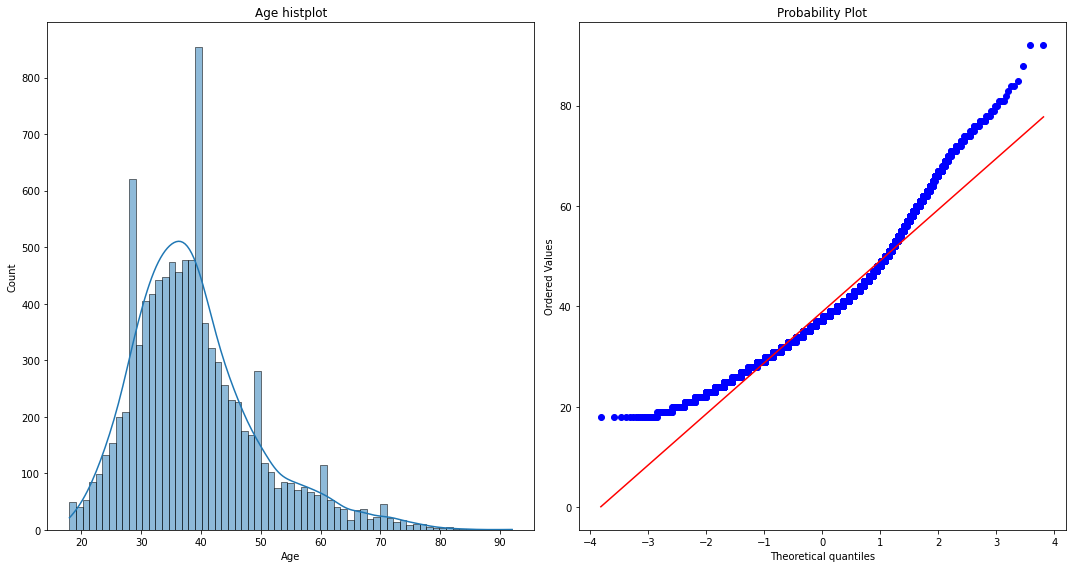

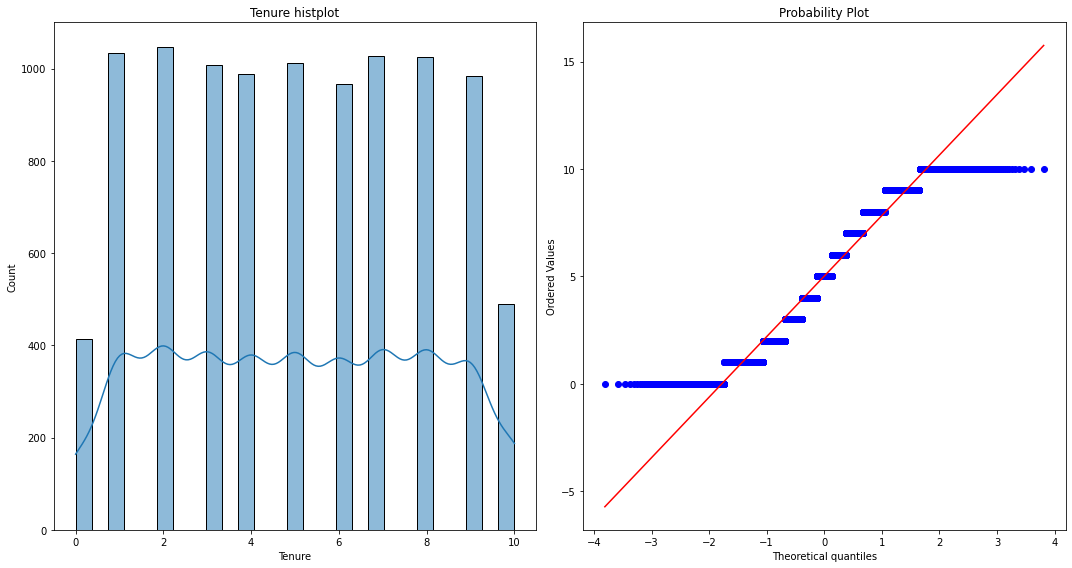

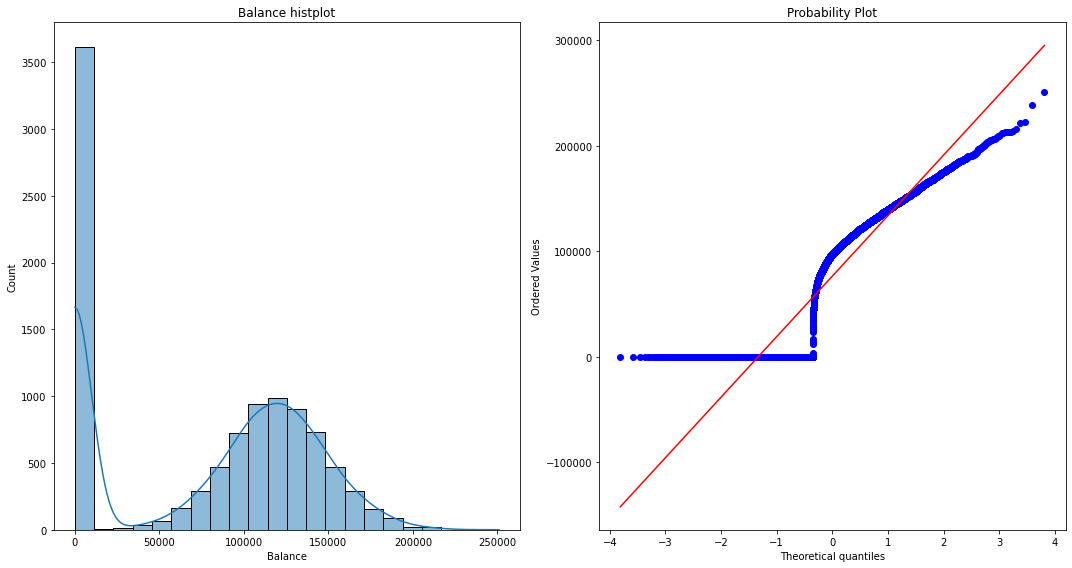

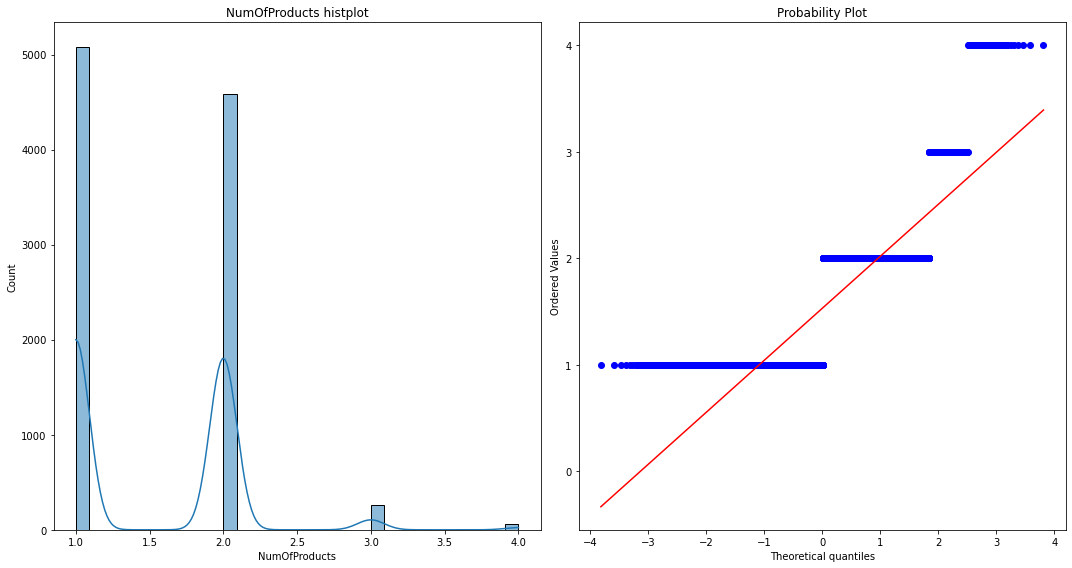

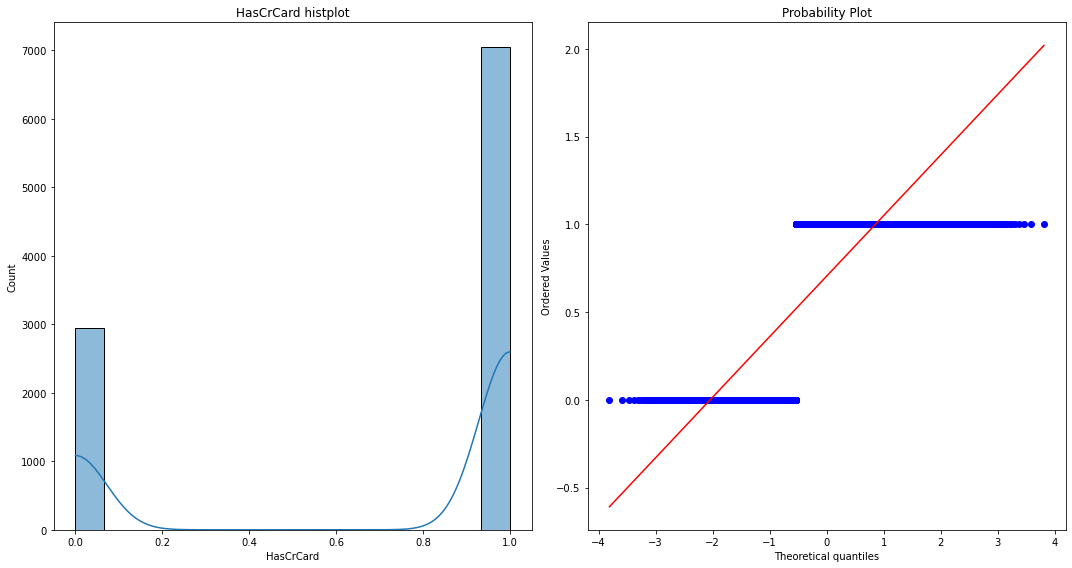

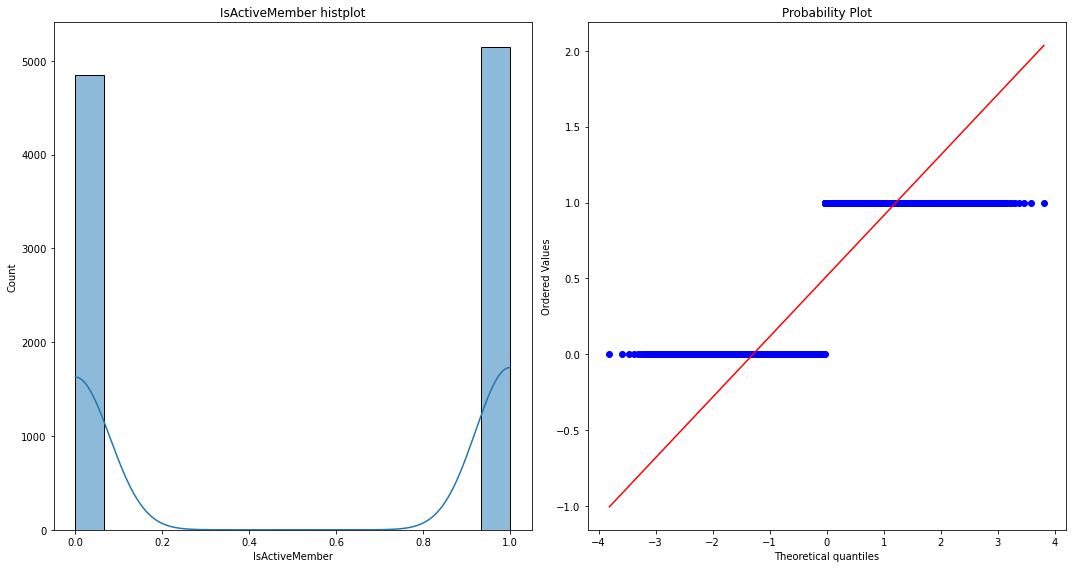

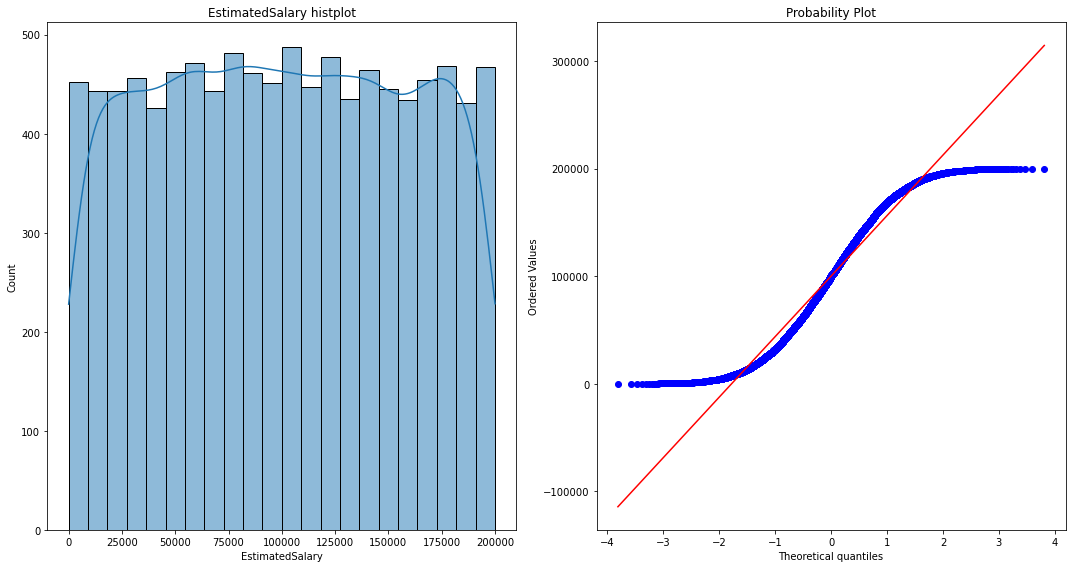

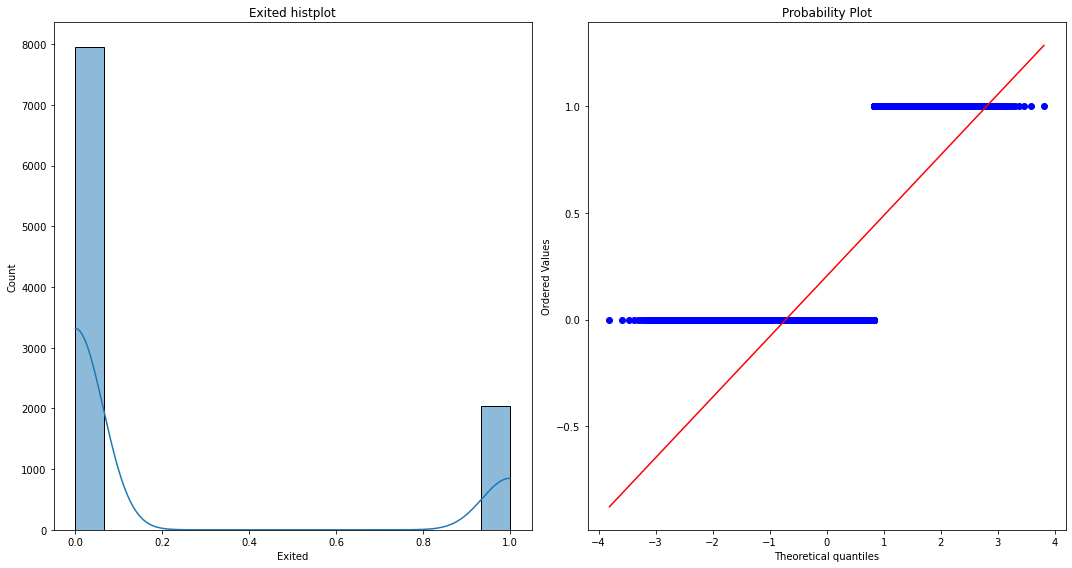

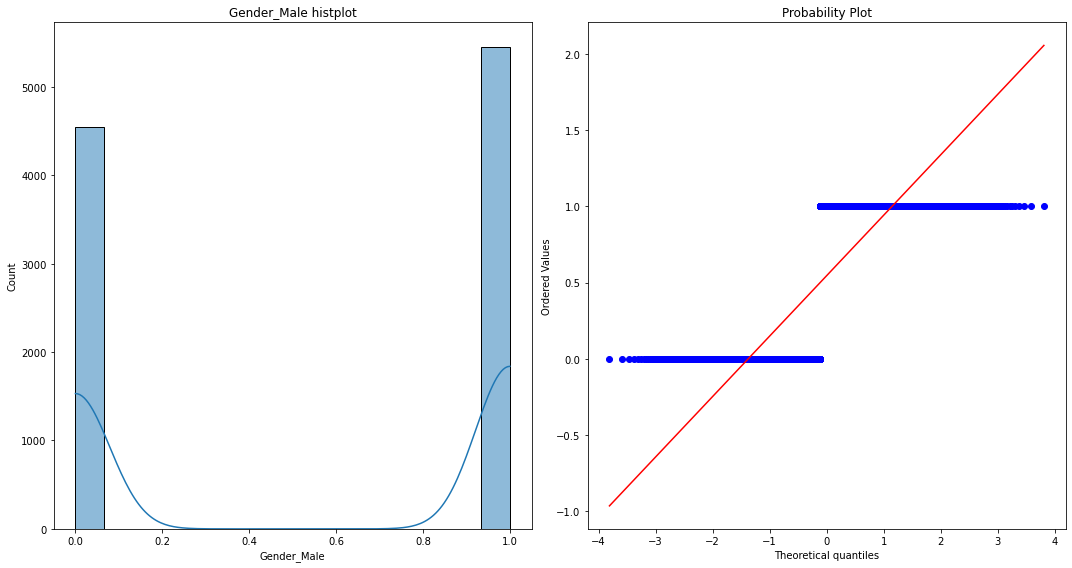

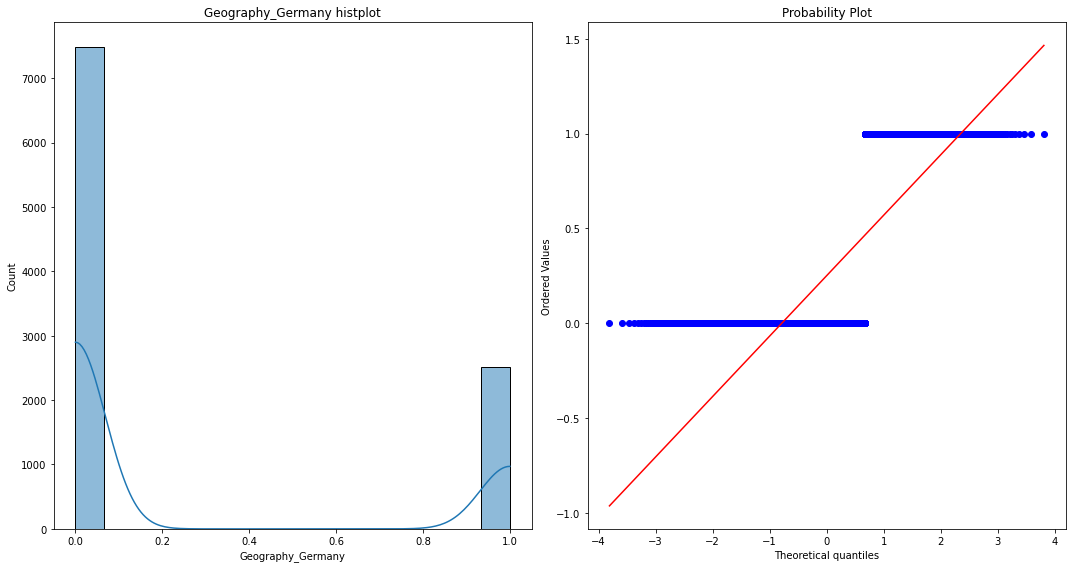

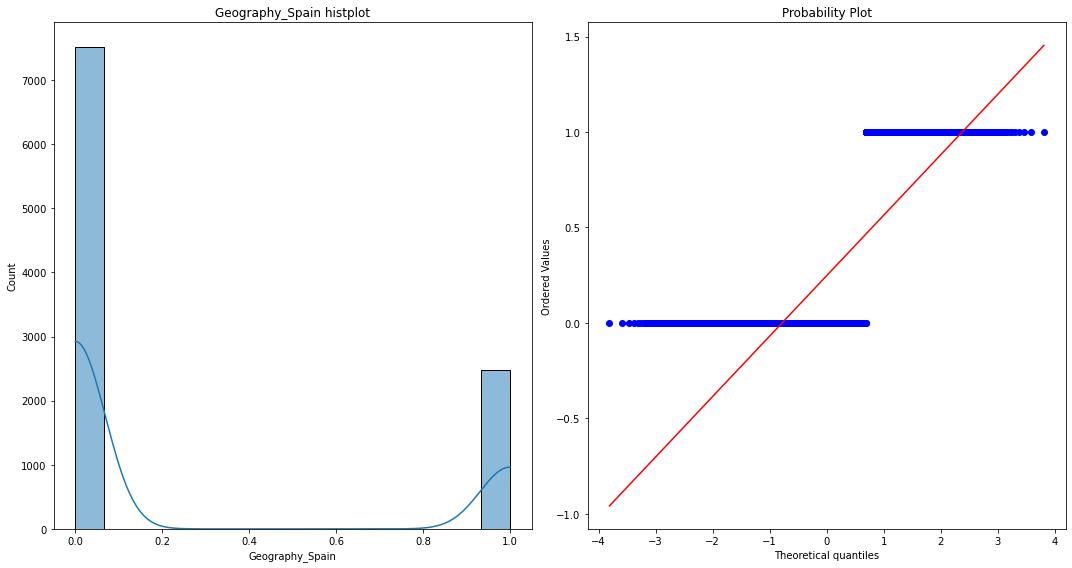

In [100]:
for i in data.columns:
    if(data[i].dtype!='object'):
        plt.figure(figsize=(15,8))
        plt.subplot(121)
        plt.title('{} histplot'.format(i))
        sns.histplot(x=data[i],kde=True)
        
        plt.subplot(122)
        stats.probplot(data[i],dist='norm',plot=plt)
        plt.tight_layout()
    
    if(data[i].dtype=='object'):
        plt.figure(figsize=(15,8))
        plt.subplot(121)
        plt.title('{} distributions'.format(i),size=14)
        data[i].value_counts()[0:10].plot.bar(color=colors_green)
        plt.xticks(rotation=30)
        
        plt.subplot(122)
        plt.title('{} distributions'.format(i),weight='bold',size=13)
        data[i].value_counts()[0:10].plot.pie(autopct='%.2f%%',shadow=True,labeldistance=1.099)
        plt.ylabel('')
        plt.tight_layout()   

In [101]:
for i in data.columns:
    if(data[i].dtype!='object'):
        print(i,data[i].skew())

CustomerId 0.001149145900554239
CreditScore -0.07160660820092675
Age 1.0113202630234552
Tenure 0.01099145797717904
Balance -0.14110871094154384
NumOfProducts 0.7455678882823168
HasCrCard -0.9018115952400578
IsActiveMember -0.06043662833499078
EstimatedSalary 0.0020853576615585162
Exited 1.4716106649378211
Gender_Male -0.1835959100396862
Geography_Germany 1.1493403288111903
Geography_Spain 1.1691059310324612


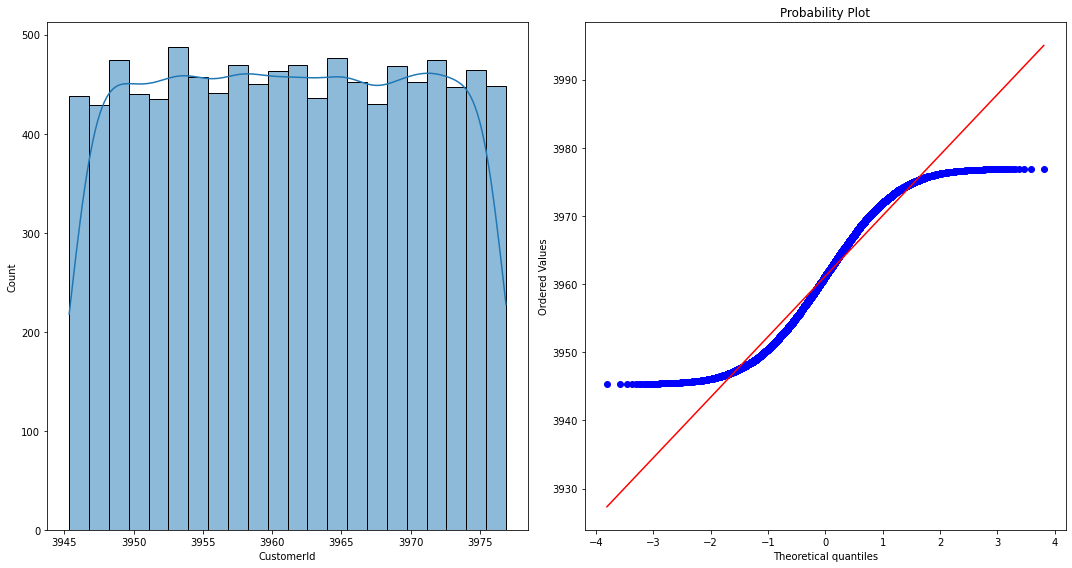

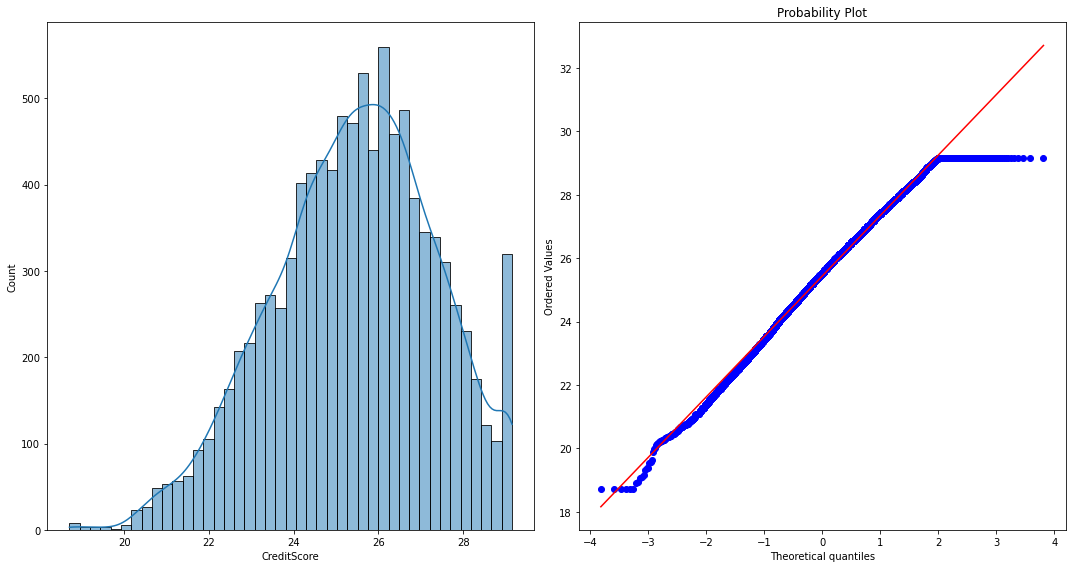

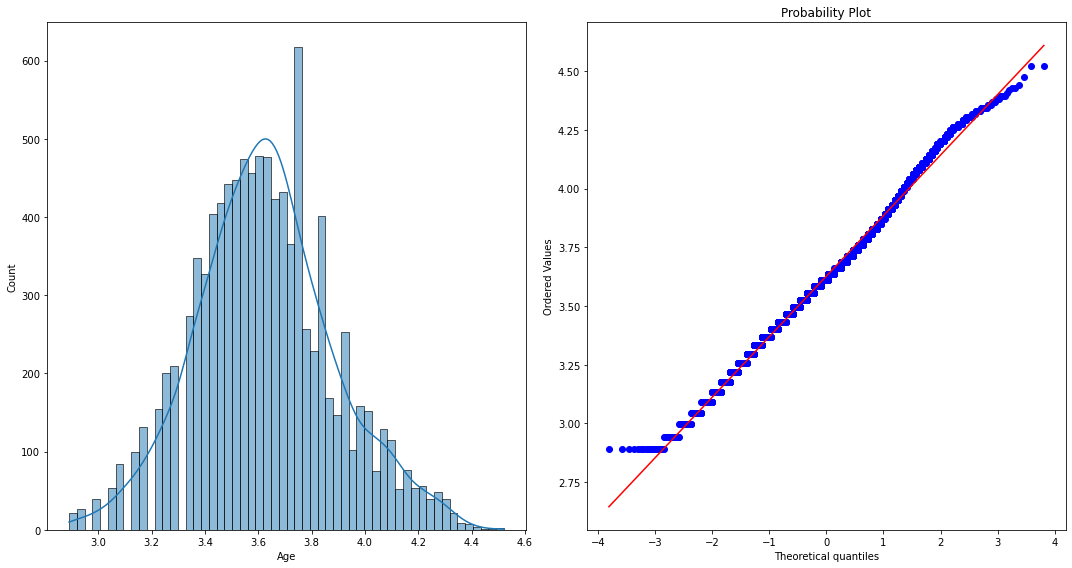

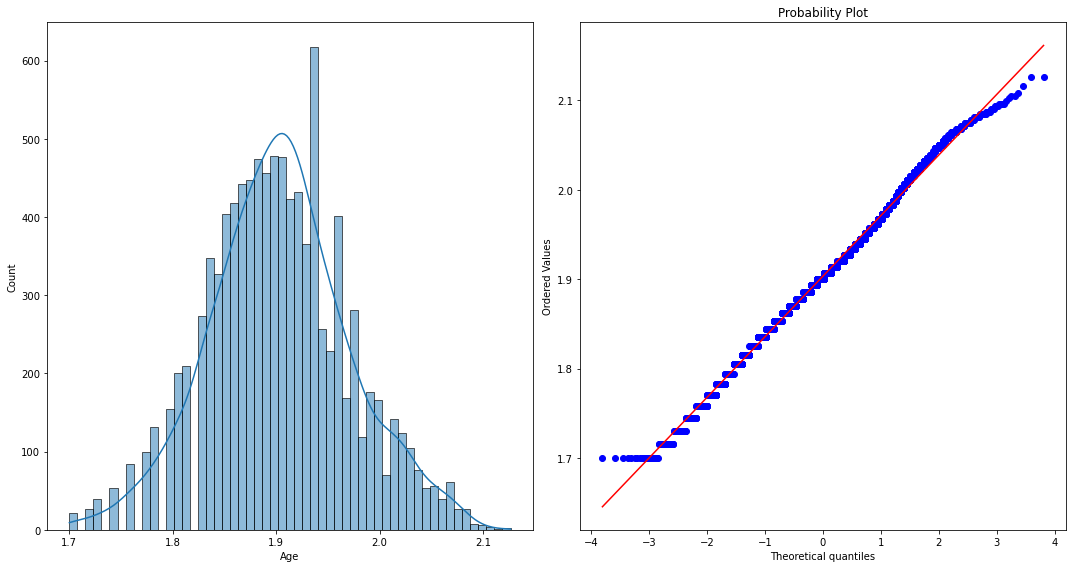

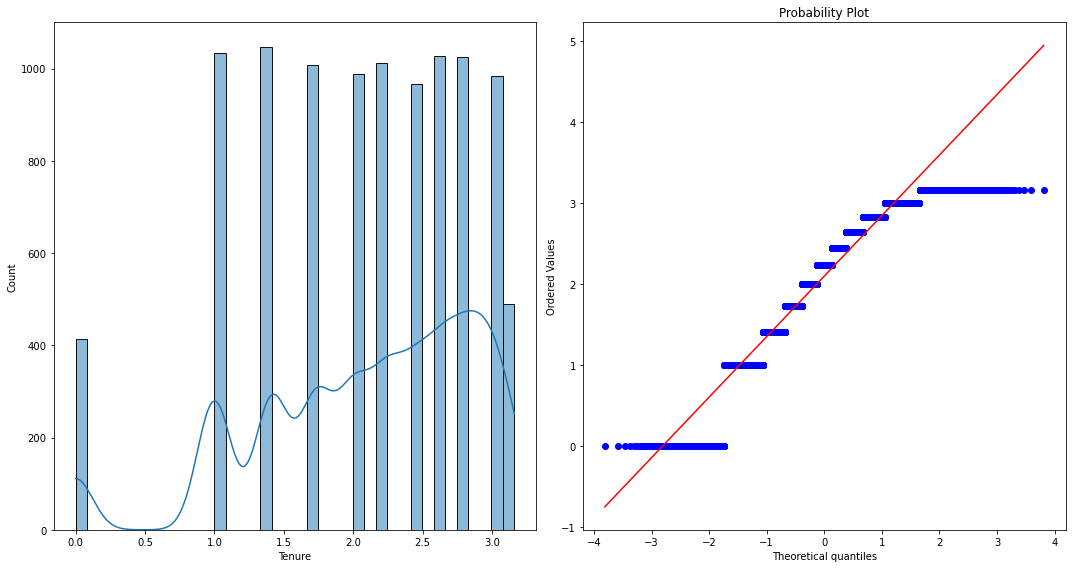

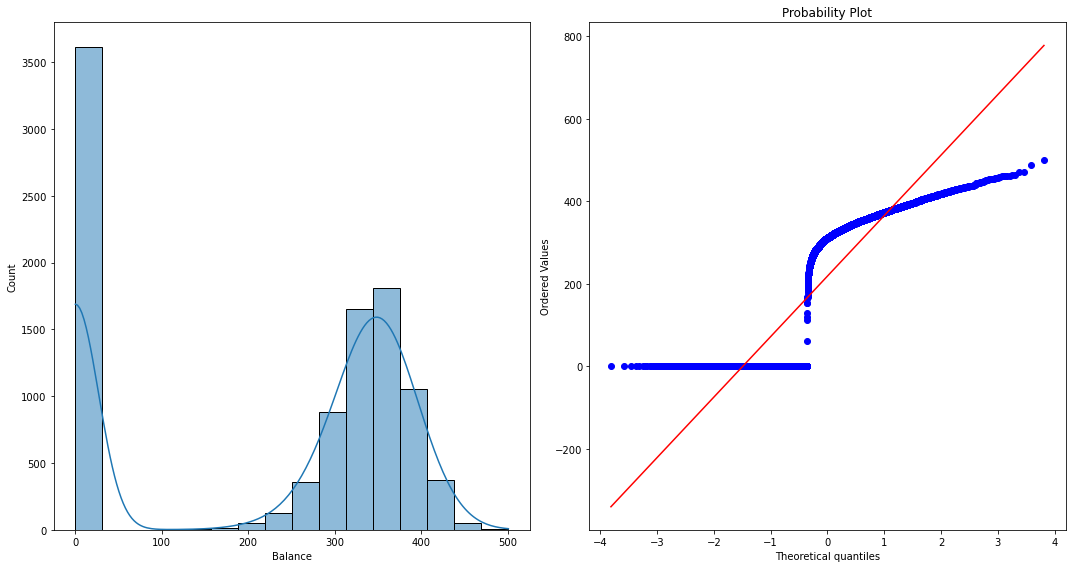

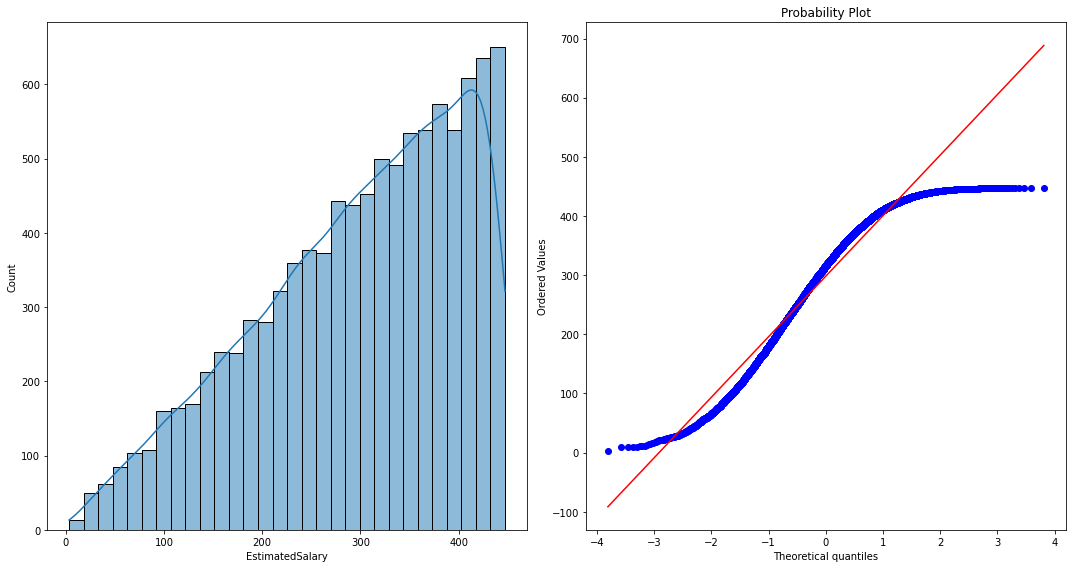

In [102]:
for i in data.columns:
    if((data[i].dtype!='object')&(data[i].nunique()>5)):
        if((data[i].skew()>1)|(data[i].skew()<-1)):
            data[i]=pd.Series(np.log(data[i].copy()))
            plt.figure(figsize=(15,8))
            plt.subplot(121)
            sns.histplot(data,x=data[i],kde=True)

            plt.subplot(122)
            stats.probplot(data[i],dist='norm',plot=plt)
            plt.tight_layout()
        if((data[i].skew()<0)|(data[i].skew()>-1)):
            data[i]=pd.Series(np.sqrt(data[i].copy()))
            plt.figure(figsize=(15,8))
            plt.subplot(121)
            sns.histplot(data,x=data[i],kde=True)

            plt.subplot(122)
            stats.probplot(data[i],dist='norm',plot=plt)
            plt.tight_layout()
        else:
            data[i],_=pd.Series(stats.yeojohnson(data[i].copy()))
            plt.figure(figsize=(15,8))
            plt.subplot(121)
            sns.histplot(data,x=data[i],kde=True)

            plt.subplot(122)
            stats.probplot(data[i],dist='norm',plot=plt)
            plt.tight_layout()

In [103]:
for i in data.columns:
    if(data[i].dtype!='object'):
        print(i,data[i].skew())

CustomerId -0.001615311203056984
CreditScore -0.25701568158192317
Age 0.06842550977471994
Tenure -0.7800969157951292
Balance -0.44277468301771317
NumOfProducts 0.7455678882823168
HasCrCard -0.9018115952400578
IsActiveMember -0.06043662833499078
EstimatedSalary -0.5782292723373402
Exited 1.4716106649378211
Gender_Male -0.1835959100396862
Geography_Germany 1.1493403288111903
Geography_Spain 1.1691059310324612


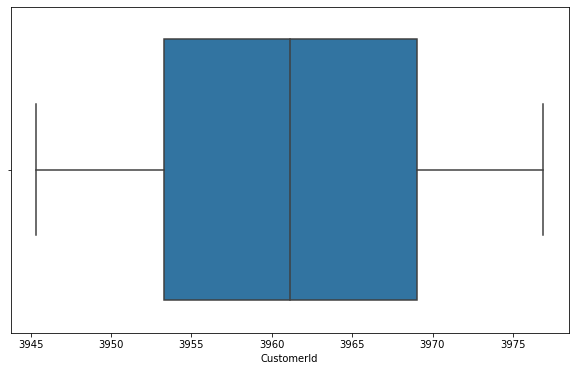

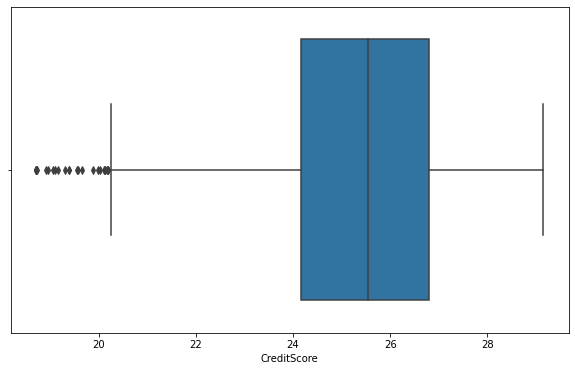

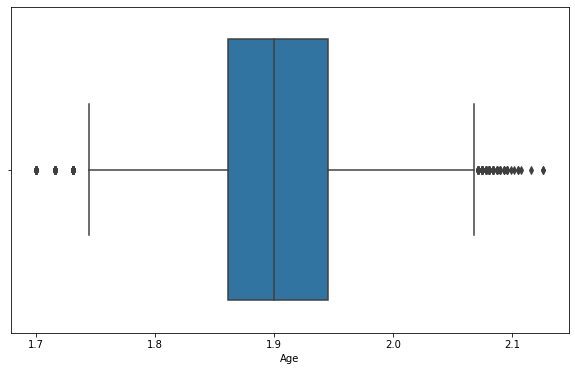

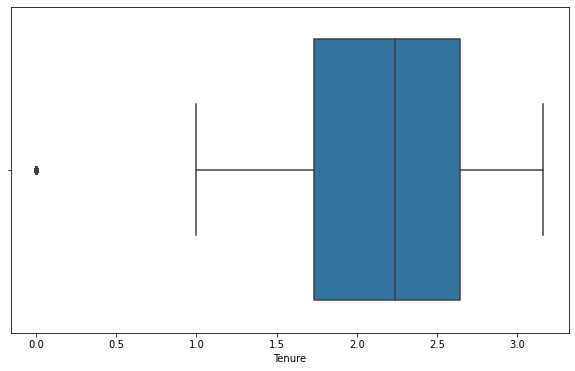

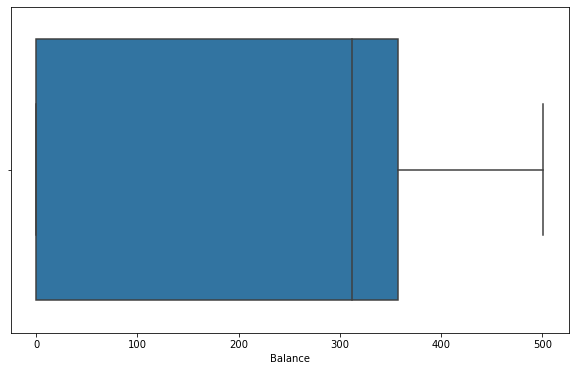

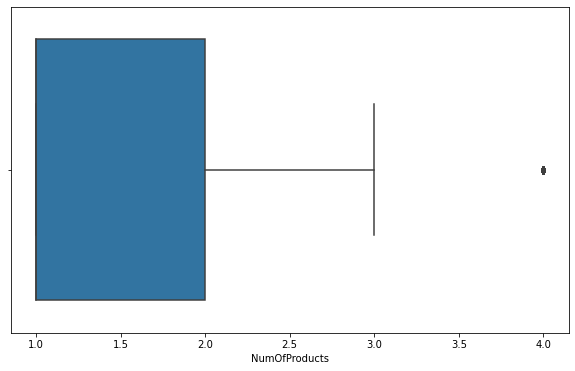

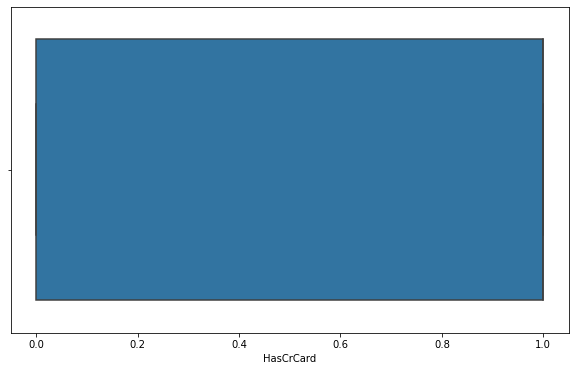

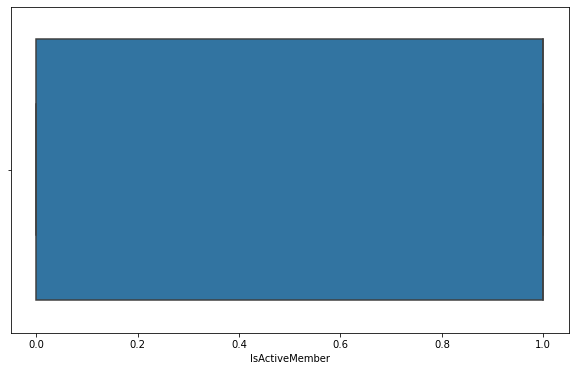

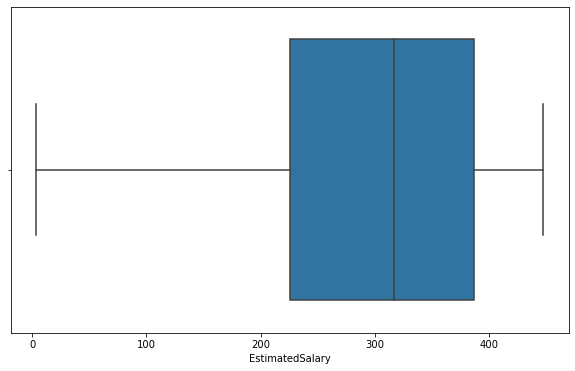

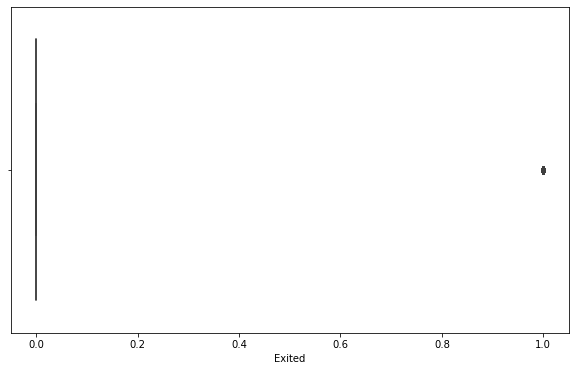

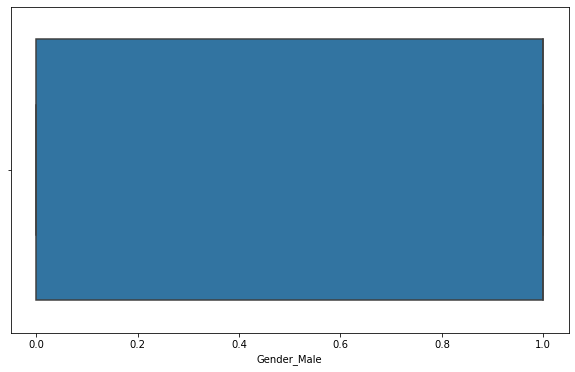

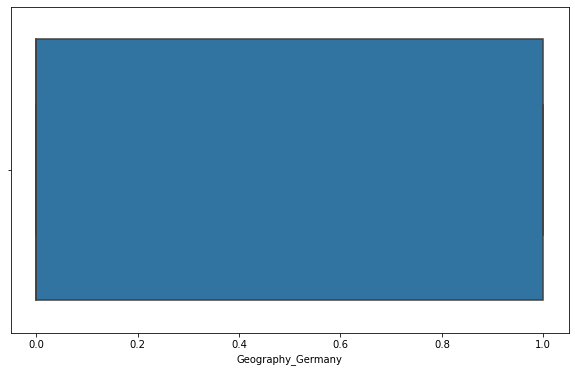

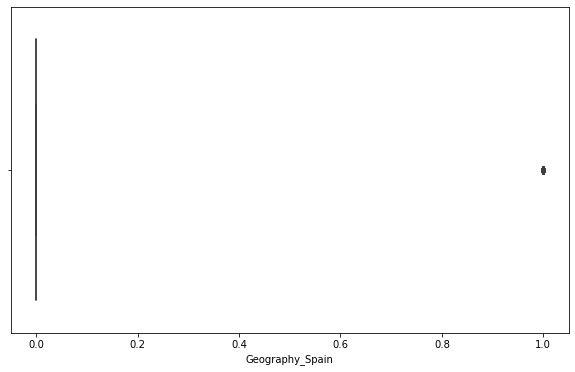

In [104]:
for i in data.columns:
    if(data[i].dtype!='object'):
        plt.figure(figsize=(10,6))
        plt.subplot(111)
        sns.boxplot(x=data[i])

In [105]:
data.drop(['Surname'],axis=1,inplace=True)

In [106]:
for i in data.columns:
    q1=data[i].quantile(0.25)
    q3=data[i].quantile(0.75)
    iqr=q3-q1
    lower=q1-(1.5*iqr)
    upper=q3+(1.5*iqr)
    if(data[i].dtype!='object'):
        if((iqr>0)&(data[i].nunique()>5)):
            data[i]=np.where(data[i]<lower,lower,np.where(data[i]>upper,upper,data[i]))

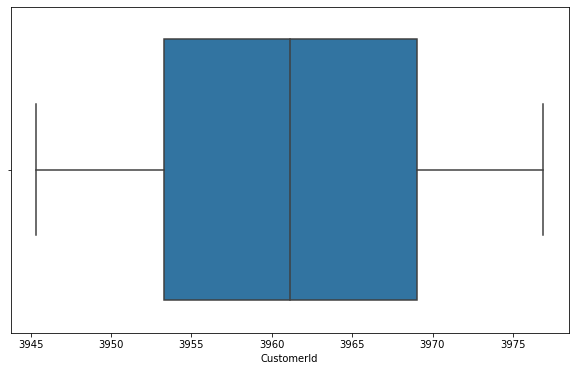

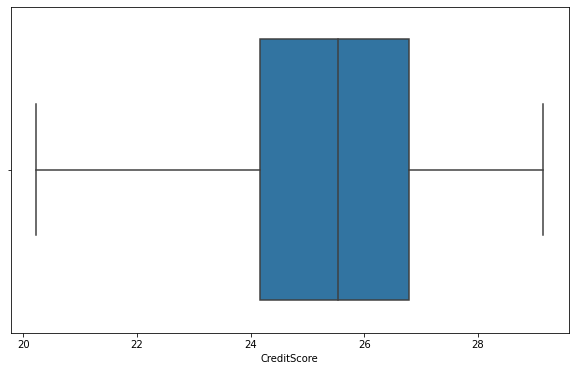

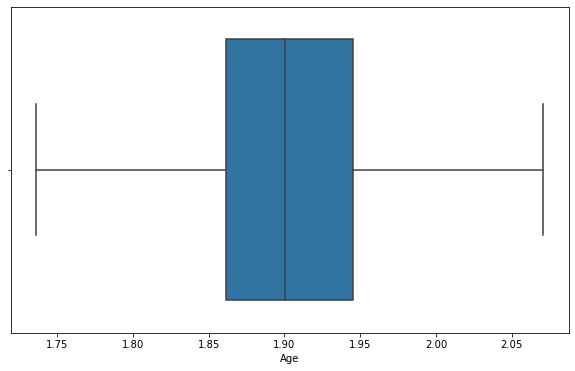

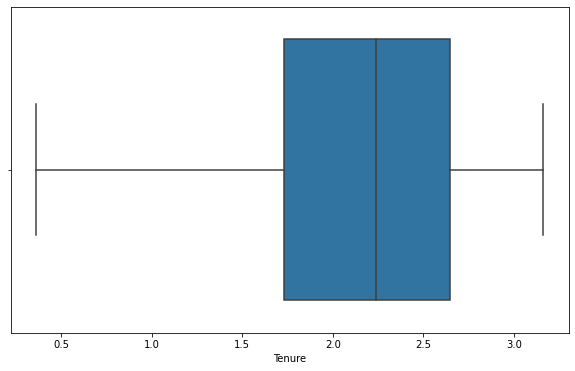

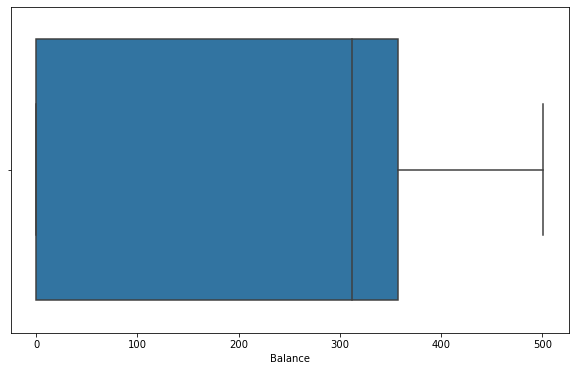

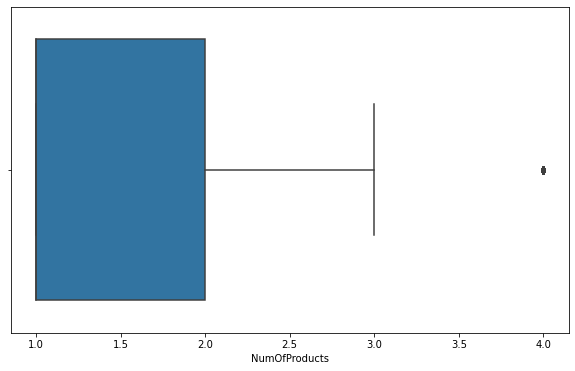

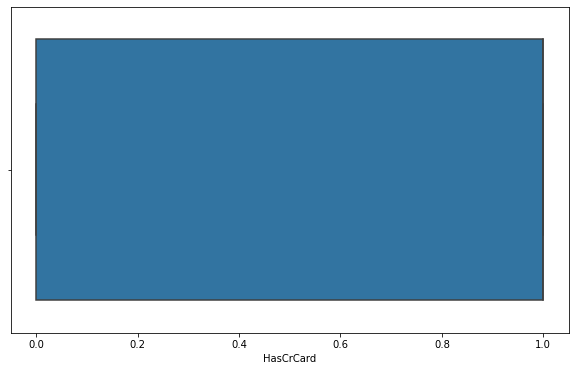

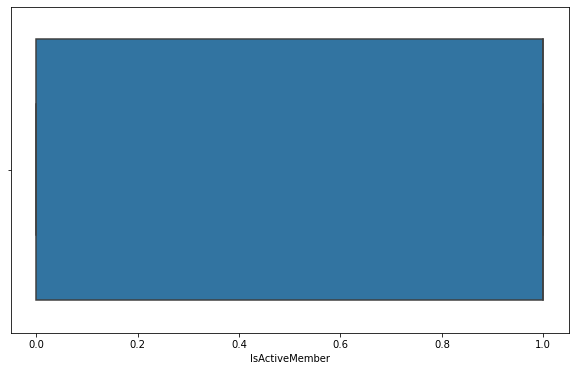

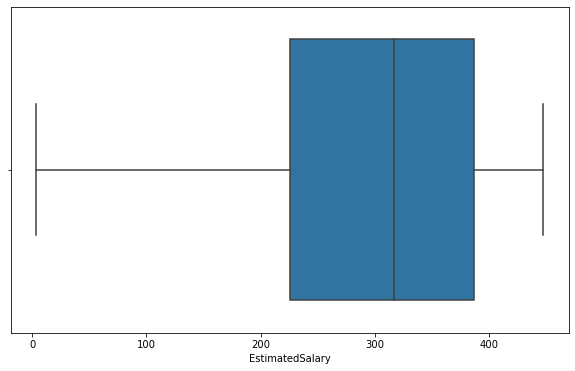

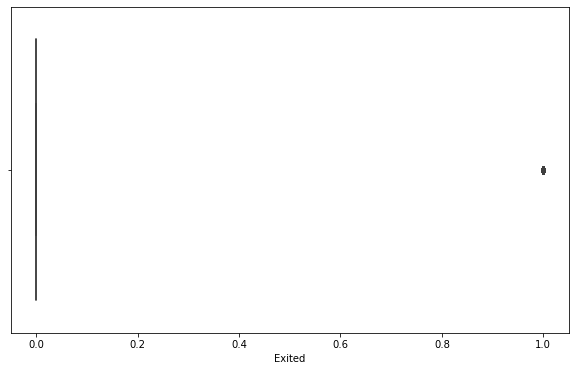

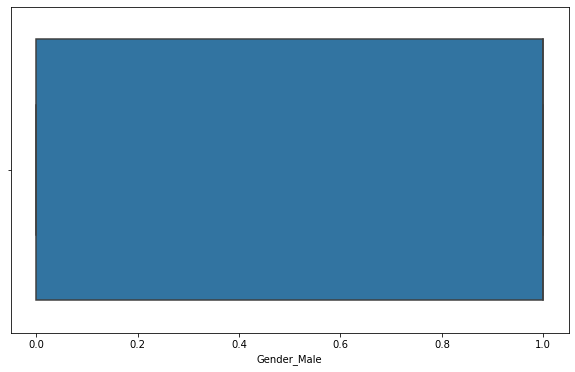

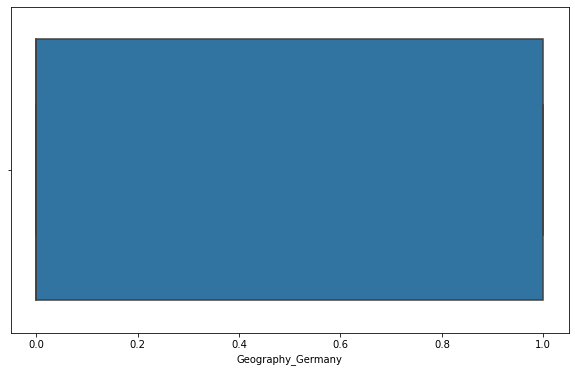

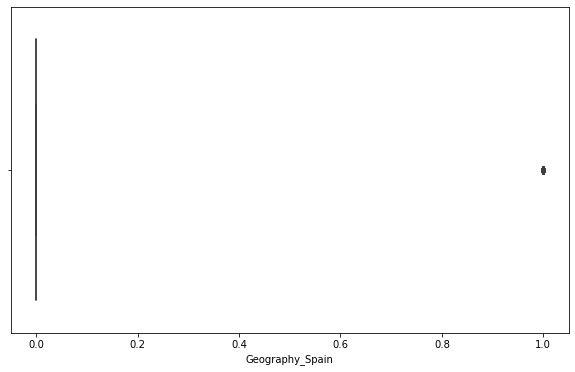

In [107]:
for i in data.columns:
    if(data[i].dtype!='object'):
        plt.figure(figsize=(10,6))
        plt.subplot(111)
        sns.boxplot(x=data[i])

In [108]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [109]:
data.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,3954.061456,24.879711,1.933305,1.414214,0.000000,1,1,1,318.353389,1,0,0,0
1,3955.668212,24.657656,1.927063,1.000000,289.495872,1,0,1,335.473665,0,0,0,1
2,3952.126516,22.405357,1.933305,2.828427,399.575775,3,1,0,337.537509,1,0,0,0
3,3962.493407,26.438608,1.914043,1.000000,0.000000,2,0,0,306.311329,0,0,0,0
4,3967.100705,29.154759,1.939381,1.414214,354.275063,1,1,1,281.218954,0,0,0,1


In [110]:
X=data.drop(['Exited'],axis=1)
y=data[['Exited']]

In [111]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [112]:
X_test

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
6252,3960.743870,24.413111,1.861649,1.732051,310.980819,2,0,0,204.422039,1,1,0
4684,3966.984119,24.959968,1.939381,1.000000,0.000000,2,1,1,382.595478,1,0,0
1731,3965.063682,24.515301,1.945299,2.000000,0.000000,2,1,0,241.994442,0,0,1
4742,3970.155413,22.494444,2.019291,2.828427,345.184154,2,1,1,413.134046,1,1,0
4521,3955.868805,23.664319,1.815444,2.645751,353.547705,1,1,1,338.629281,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6412,3949.554658,24.535688,1.992559,2.236068,313.478612,1,0,1,212.222266,0,1,0
8285,3946.217303,24.677925,1.794123,3.162278,0.000000,1,0,1,331.504389,1,0,0
7853,3968.207908,27.018512,1.962179,2.645751,0.000000,1,1,0,182.683497,0,0,0
1095,3960.944458,26.305893,1.835019,2.000000,0.000000,1,1,0,277.048714,1,0,0


In [113]:
scaler=StandardScaler()

In [116]:
train_scaled=scaler.fit_transform(X_train)
test_scaled=scaler.transform(X_test)

X_train=pd.DataFrame(train_scaled,columns=X_train.columns)
X_test=pd.DataFrame(test_scaled,columns=X_test.columns)

In [117]:
from sklearn.linear_model import LogisticRegression 
logreg=LogisticRegression()

In [118]:
logreg.fit(X_train,y_train)

C:\Users\aikik\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression()

In [120]:
predicitons=logreg.predict(X_test)

In [122]:
y_hat=pd.DataFrame(predicitons,columns=['predicted'])

In [127]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.86      0.42      0.56      1607
           1       0.23      0.72      0.35       393

    accuracy                           0.48      2000
   macro avg       0.55      0.57      0.46      2000
weighted avg       0.74      0.48      0.52      2000

